In [69]:
import os
import re
import json
import time
import requests
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
import numpy as np
import pandas as pd

from web3 import Web3
w3 = Web3(Web3.HTTPProvider('http://127.0.0.1:8545'))

def exec(commandString):
    output_stream = os.popen(commandString)
    res = output_stream.read()
    output_stream.close()
    return res

def extractAddress(response, label):
    match = re.findall(re.escape(label) + r"\s+0x[a-fA-F0-9]{40}", response)
    return match[0].split()[-1]

In [70]:
currentTime = int(time.time() * 1000)
daySeconds = 24*3600
dayMSeconds = 1000*daySeconds
nDAYS = 'max'
AMPL_INITIAL_SUPPLY = 50000000

START_DATE = 1576368000000 # dec 15 2019
# START_DATE = 1609459200000 # jan 1 2021
END_DATE = currentTime  - dayMSeconds - (currentTime%dayMSeconds)

amplHistroy = json.loads(requests.get('https://web-api.ampleforth.org/eth/token-rebase-history').content)
amplDf = pd.DataFrame(amplHistroy, columns=['epoch', 'price', 'price_target', 'supply', 'time'])
amplDf = amplDf[amplDf['time'] >= START_DATE/1000]
amplDf['time'] = (amplDf['time'] - (amplDf['time'] % daySeconds))
amplDf['time'] = pd.to_datetime(amplDf['time'], unit='s')
amplDf = amplDf.set_index('time')
amplDf['marketcap'] = amplDf['price'] * amplDf['supply']

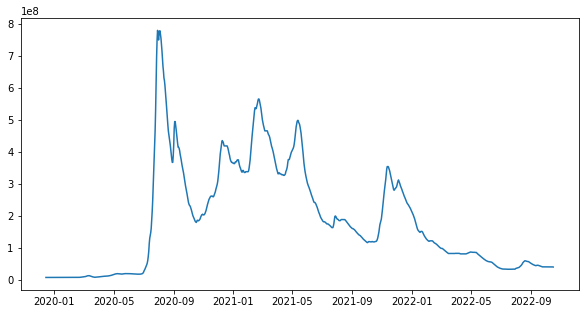

In [71]:
plt.plot(amplDf['supply'])
plt.show()

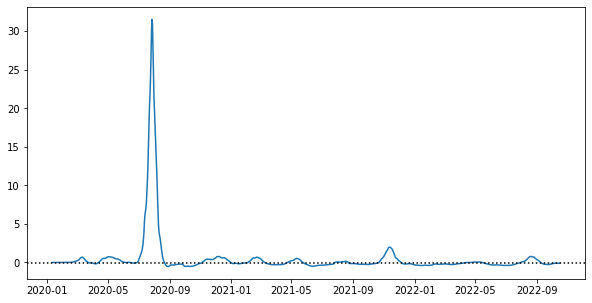

,supply
count,1008.000000
mean,0.509235
std,3.072706
min,-0.520193
25%,-0.248839
50%,-0.070433
75%,0.252077
max,31.546720


In [73]:
r = amplDf['supply'].pct_change(periods=28)
plt.plot(r)
plt.axhline(y=r.median(), color='black', linestyle="dotted")
plt.show()

pd.DataFrame(r).describe()